# Name-Jash Shah

# **Project Statement**

## Quantum GAN for Discrete Distribution on CIFAR-10.

**GANs, or generative adversarial networks, have emerged as a dominating tool for creating synthetic images.. Quantum GANs (QGANs) have emerged as a viable way to improve generative modeling by leveraging quantum advantages.To do this, we train two neural networks in a simulation: a generator and a discriminator. The generator's job is to generate synthetic data that closely resembles the genuine training dataset. The discriminator, on the other hand, works like a detective, attempting to distinguish between authentic and fraudulent data**

# Importing necessary libraries

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import Counter
import pandas as pd


In [ ]:
pip install tensorflow

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:

columns = [f"pixel_{i}" for i in range(X_train.shape[1] * X_train.shape[2] * X_train.shape[3])]
df_train = pd.DataFrame(X_train.reshape(X_train.shape[0], -1), columns=columns)
df_train["label"] = y_train.flatten()
print("Head of the DataFrame:")
print(df_train.head())
num_rows, num_columns = df_train.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Head of the DataFrame:
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0       59       62       63       43       46       45       50       48   
1      154      177      187      126      137      136      105      104   
2      255      255      255      253      253      253      253      253   
3       28       25       10       37       34       19       38       35   
4      170      180      198      168      178      196      177      185   

   pixel_8  pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  pixel_3066  \
0       43       68  ...         216         184         140         151   
1       95      102  ...         143         133         139         143   
2      253      253  ...          78          85          83          79   
3       20       42  ...          54          47          28          63   
4      203      183  ...          75          79          82          71   

   pixel_3067  pixel_3068  pixel_3069  pixel_3070  pixel_

**Going through the number of rows and number of columns,as it assumes that the images and in 3D array such as (batch_size, height, width, channels),so flattens the images to 1D array and therefore having the detailed information of our dataset.**


# Explore visual data


The CIFAR-10 images are RGB with 10 classes

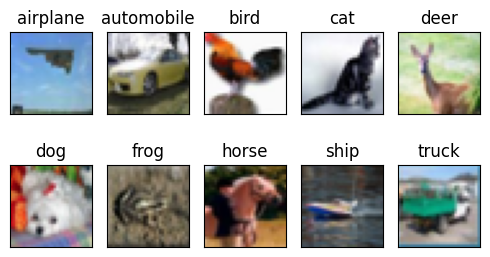

In [ ]:

GRID_WIDTH = 5
GRID_HEIGHT = 3

num_classes = len(np.unique(y_train))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
figure = plt.figure(figsize=(GRID_WIDTH, GRID_HEIGHT))
for class_index in range(num_classes):
    axis = plt.subplot(2, 5, 1 + class_index, xticks=[], yticks=[])
    indices_for_class = np.where(y_train[:] == class_index)[0]
    class_features = X_train[indices_for_class, ::]
    random_image_index = np.random.randint(class_features.shape[0])
    displayed_image = class_features[random_image_index, ::]
    axis.set_title(class_names[class_index])
    plt.imshow(displayed_image)

plt.tight_layout()

**Generating a grid of subplots where showcasing the different classes.A randomly image is selected and it generates a 2x5 grid image corresponidng with the class name.**

In [ ]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.cifar10.load_data()
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


**Running the example loads the dataset and prints the shape of the input and output components of the train and test splits of images.**

**We can see that there are 50K examples in the training set and 10K in the test set and that each image is a square of 32 by 32 pixels.**

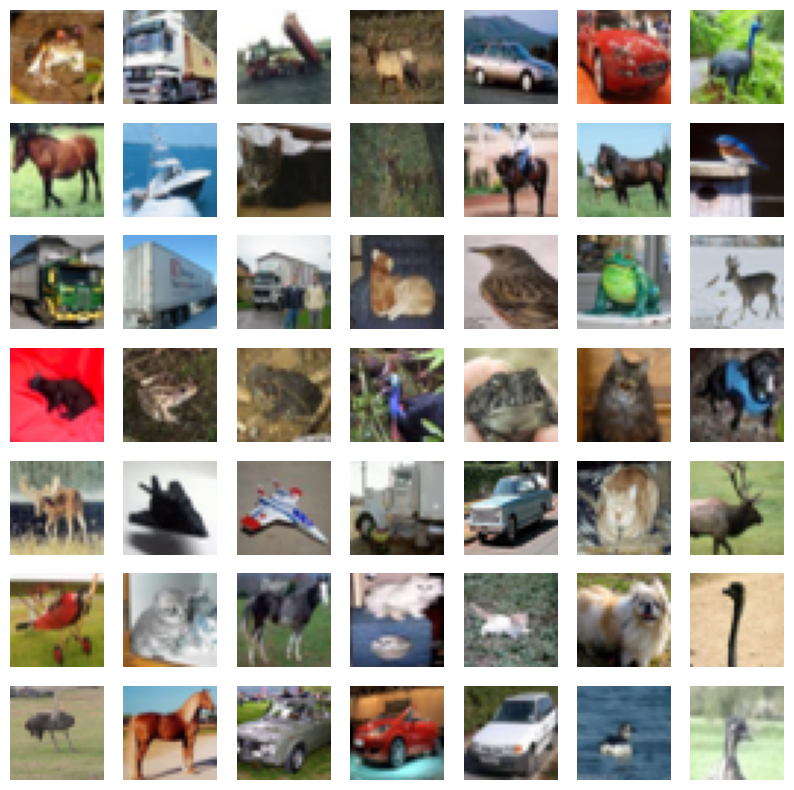

In [ ]:
(trainX, trainy), (testX, testy) =tf.keras.datasets.cifar10.load_data()
plt.figure(figsize=(10, 10))
for i in range(49):
    plt.subplot(7, 7, 1 + i)
    plt.axis('off')
    plt.imshow(trainX[i])

**We will utilize the photos in the training dataset to train a Generative Adversarial Network.**

**Specifically, the generator model will learn how to produce new plausible pictures of things using a discriminator that will attempt to discriminate between genuine images from the CIFAR10 training dataset and new images output by the generator model.**

# Class Distribution

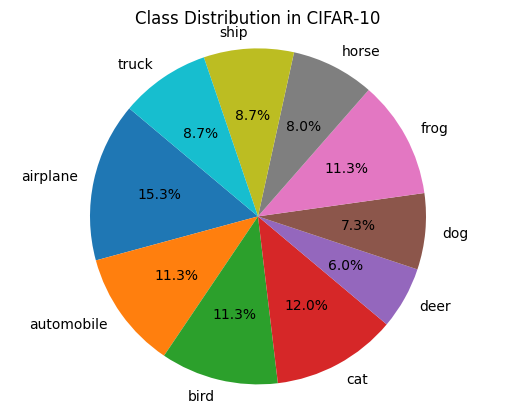

In [ ]:
train_labels = np.random.randint(low=0, high=10, size=100)
test_labels = np.random.randint(low=0, high=10, size=50)
all_labels = np.concatenate([train_labels, test_labels])
class_counts = Counter(all_labels.flatten())
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.pie(class_counts.values(), labels=class_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution in CIFAR-10')
plt.show()

**Showing the class distribution of each class in percentage to of images in combined set of training and testings lables**

# Intensity Distribution

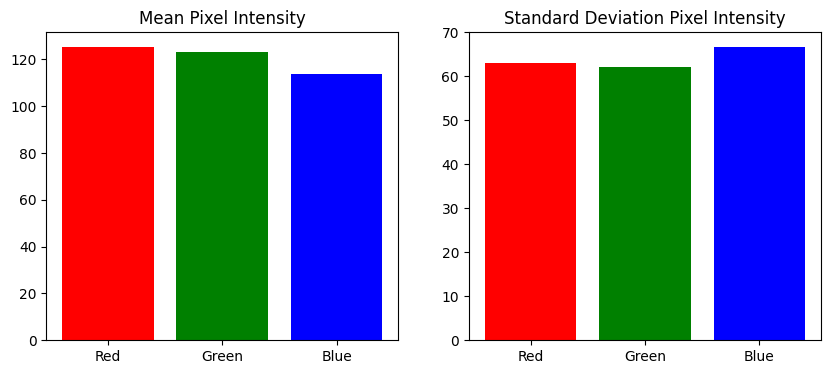

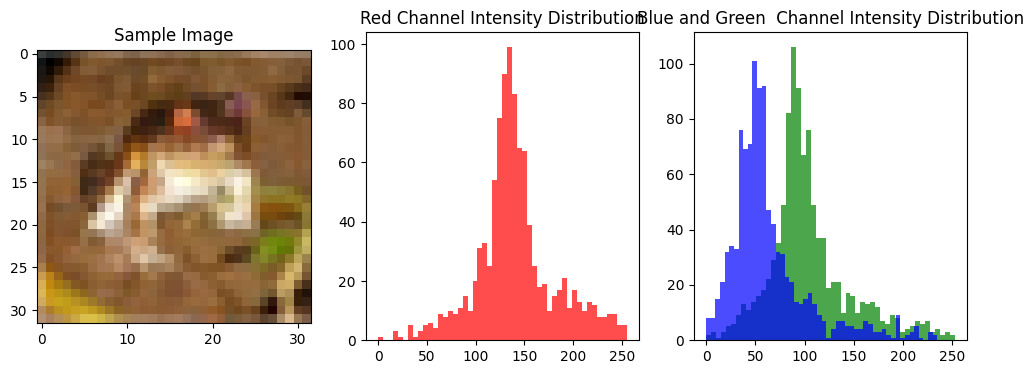

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
mean_intensity = np.mean(train_images, axis=(0, 1, 2))
std_intensity = np.std(train_images, axis=(0, 1, 2))
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(range(3), mean_intensity, color=['red', 'green', 'blue'])
axes[0].set_xticks(range(3))
axes[0].set_xticklabels(['Red', 'Green', 'Blue'])
axes[0].set_title('Mean Pixel Intensity')

axes[1].bar(range(3), std_intensity, color=['red', 'green', 'blue'])
axes[1].set_xticks(range(3))
axes[1].set_xticklabels(['Red', 'Green', 'Blue'])
axes[1].set_title('Standard Deviation Pixel Intensity')

plt.show()
sample_image = train_images[0]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(sample_image)
axes[0].set_title('Sample Image')

axes[1].hist(sample_image[:, :, 0].flatten(), bins=50, color='red', alpha=0.7)
axes[1].set_title('Red Channel Intensity Distribution')

axes[2].hist(sample_image[:, :, 1].flatten(), bins=50, color='green', alpha=0.7)
axes[2].set_title('Green Channel Intensity Distribution')

axes[2].hist(sample_image[:, :, 2].flatten(), bins=50, color='blue', alpha=0.7)
axes[2].set_title('Blue and Green  Channel Intensity Distribution')


plt.show()

**Determining the red, green, and blue channel pixel intensities in the CIFAR-10 dataset's mean and standard deviation. The mean and standard deviation are next displayed using bar charts, and finally, the pixel intensity distribution for every channel in an example image is shown.**

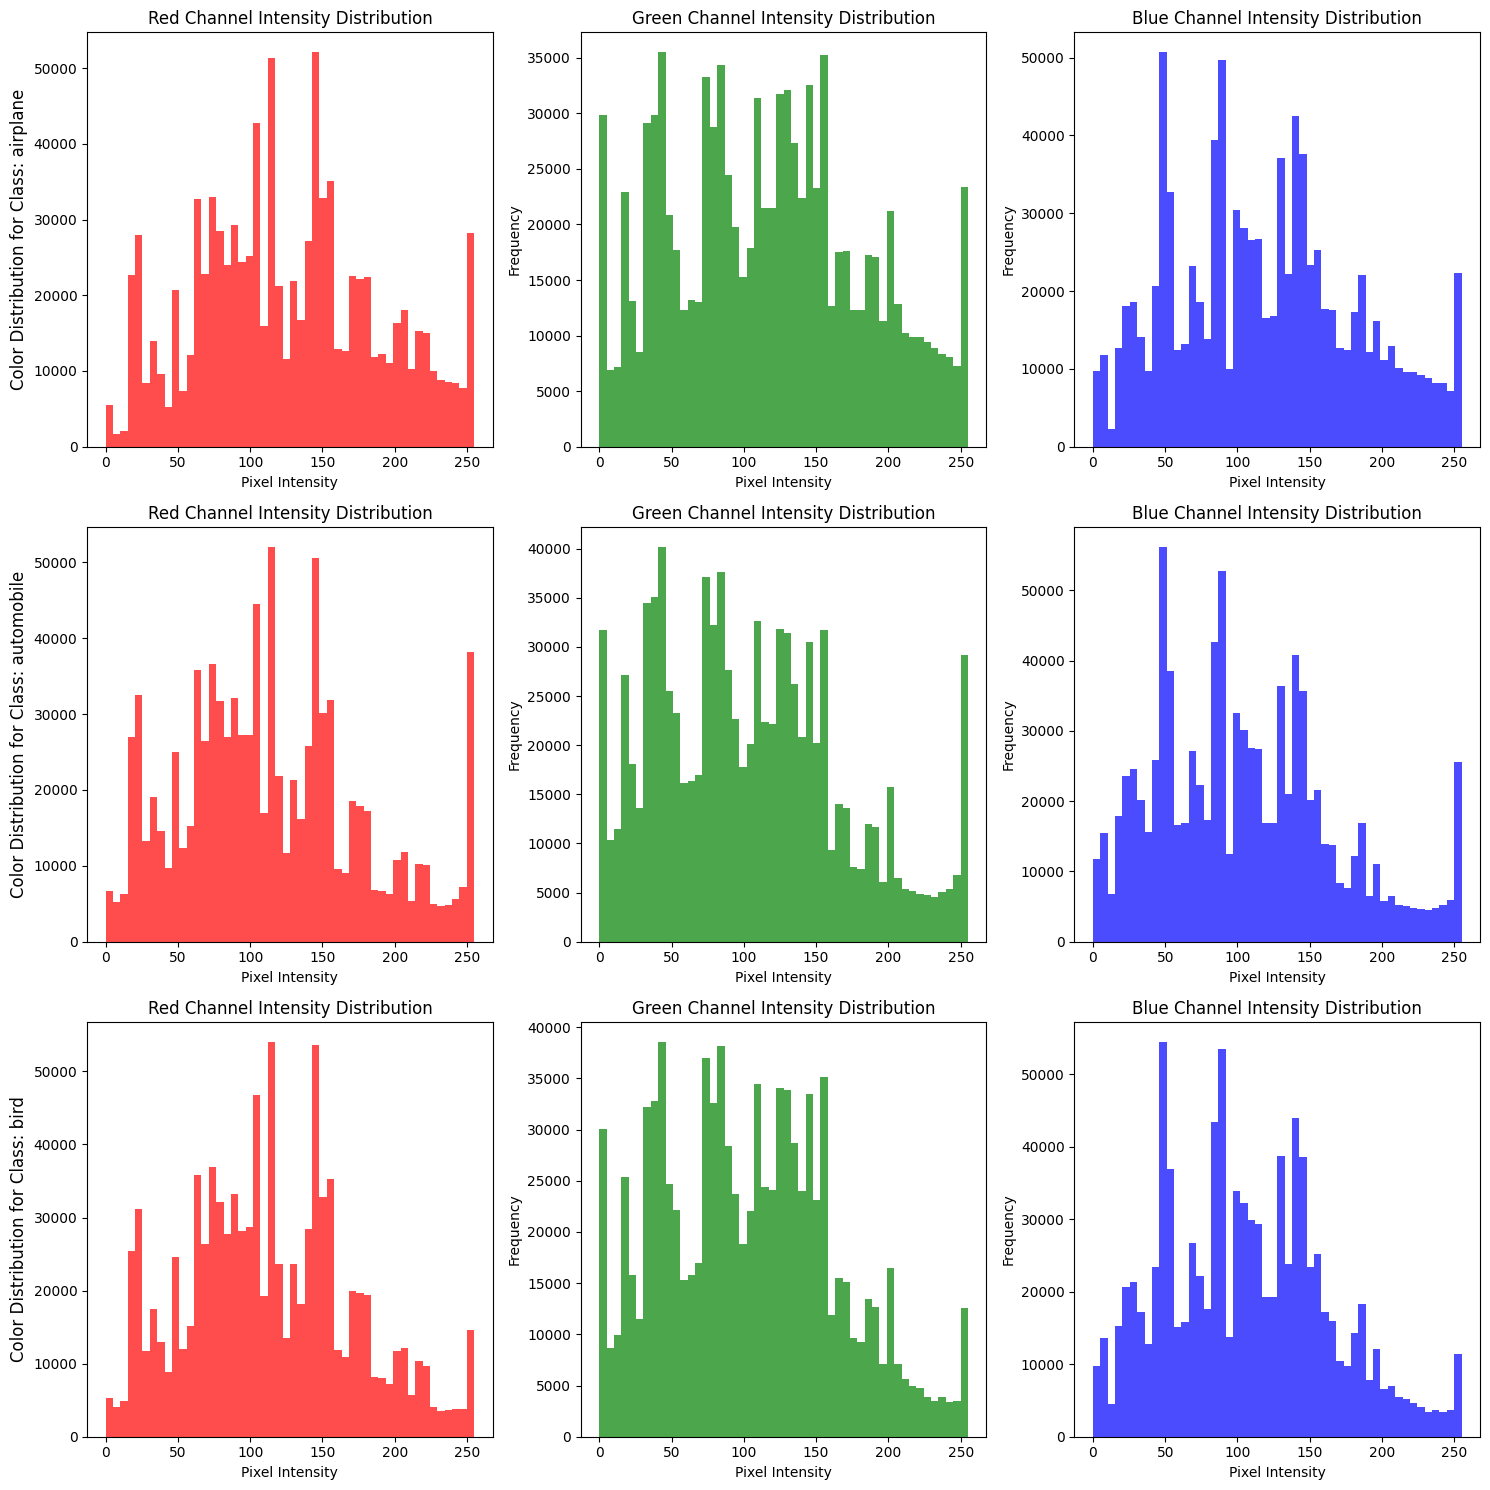

In [ ]:
def plot_color_distributions(images, labels, class_names_to_analyze):
    num_classes = len(class_names_to_analyze)
    _, axes = plt.subplots(num_classes, 3, figsize=(15, 5 * num_classes))

    for idx, class_name in enumerate(class_names_to_analyze):
        class_indices = np.squeeze(np.where(labels == class_names.index(class_name)))
        class_images = images[class_indices]

        for i, color in enumerate(['Red', 'Green', 'Blue']):
            axes[idx, i].hist(class_images[:, :, :, i].flatten(), bins=50, color=color.lower(), alpha=0.7)
            axes[idx, i].set_title(f'{color} Channel Intensity Distribution')
            axes[idx, i].set_xlabel('Pixel Intensity')
            axes[idx, i].set_ylabel('Frequency')

        axes[idx, 0].set_ylabel(f'Color Distribution for Class: {class_name}', rotation=90, size='large')

    plt.tight_layout()
    plt.show()
classes_to_analyze = ['airplane', 'automobile', 'bird']
plot_color_distributions(train_images, train_labels, classes_to_analyze)



**In this, the training photos, labels, and class name are passed to the plot_color_distribution function for analysis. After that, it plots the Red, Green, and Blue channels' histograms independently. This function may be used to examine the CIFAR-10 dataset's color distribution for various classes.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

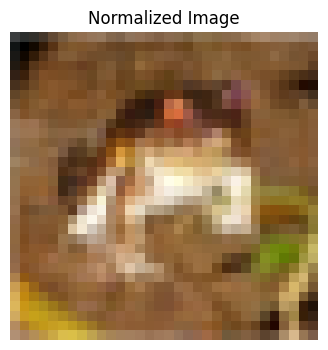

In [ ]:
sample_images = train_images[:100]
sample_images = tf.convert_to_tensor(sample_images, dtype=tf.float32)
resized_images = tf.image.resize(sample_images, [32, 32])
normalized_images = resized_images / 255.0
plt.figure(figsize=(4, 4))
plt.imshow(normalized_images[0])
plt.title('Normalized Image')
plt.axis('off')
plt.show()

**The first normalized picture is displayed after the first 100 photos from the training set are transformed into a TensorFlow tensor, resized to a fixed size (32x32), and their pixel values are normalized to fall between [0, 1]. Prior to supplying photos to a machine learning model, this is a typical preprocessing step.**

# Data Augmentation

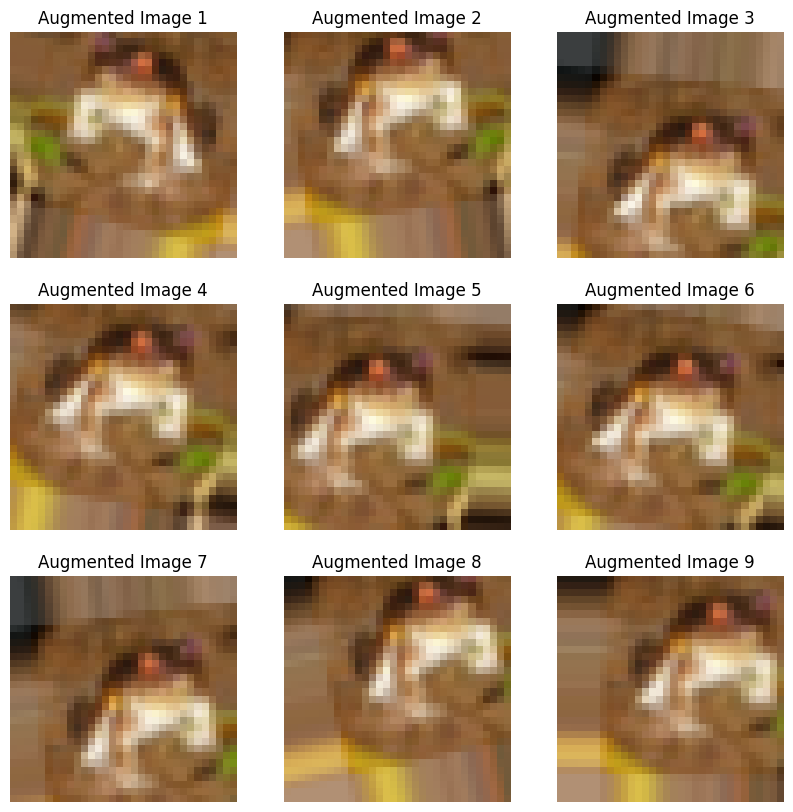

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
sample_image = np.expand_dims(train_images[0], axis=0)
augmented_images = datagen.flow(sample_image, batch_size=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    augmented_image = augmented_images.next()[0].astype(np.uint8)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
plt.show()

**The original picture is subjected to random flips (horizontal and vertical) and rotations (up to 20 degrees), as well as shifts (up to 20% of the image width and 20% of the image height). As a consequence, a collection of enhanced photos is produced, which may be utilized to improve the training data's variety and improve model generalization.**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns

# Label Co-occurrence matrix and confusion matrix

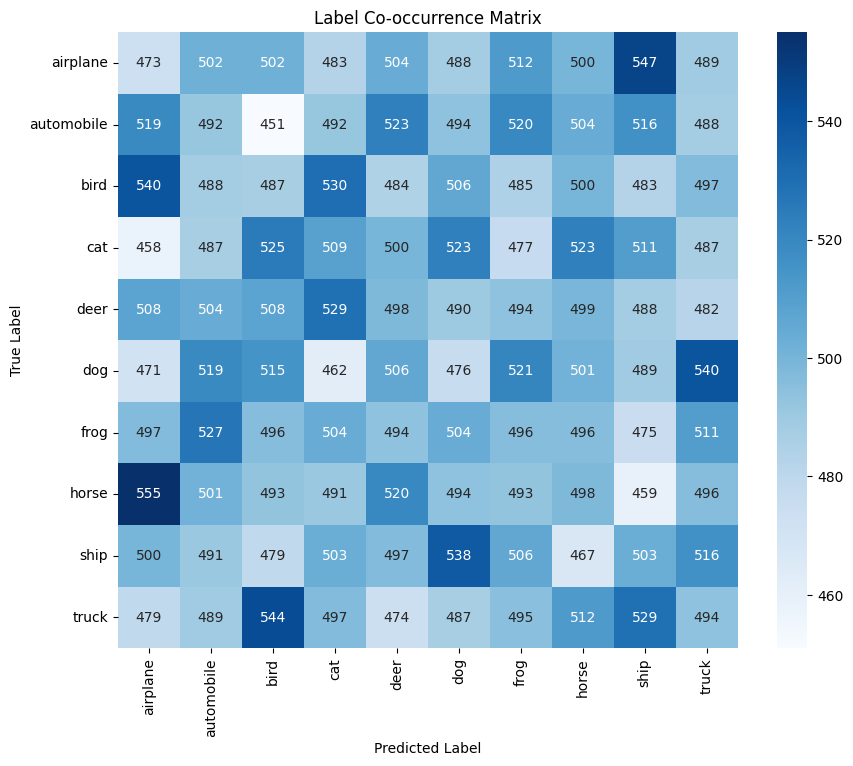

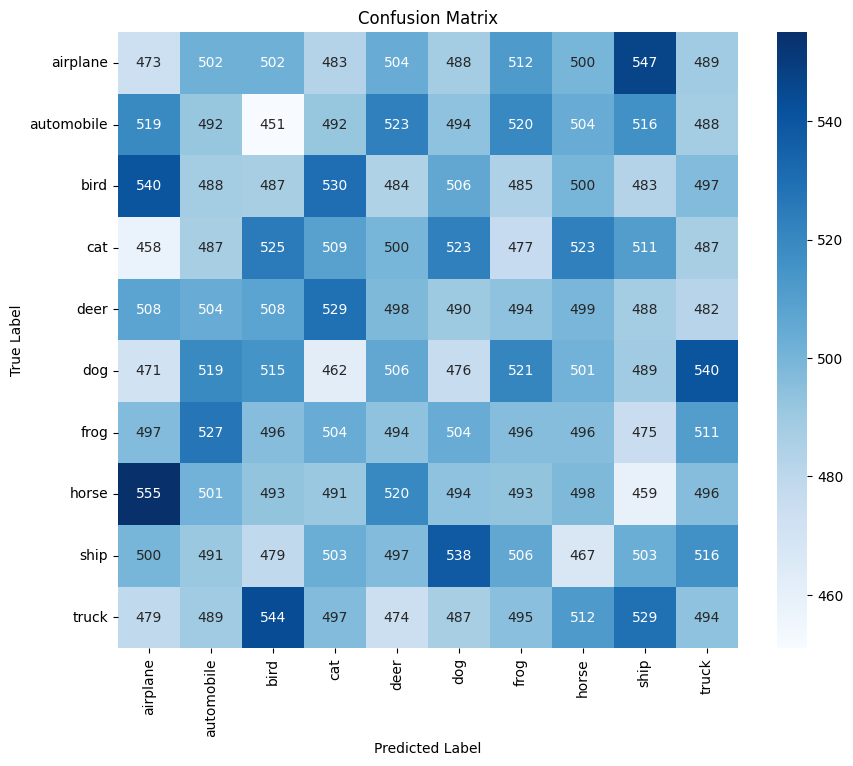

In [ ]:
train_labels_flat = train_labels.flatten()
co_occurrence_matrix = np.zeros((10, 10), dtype=int)

for i in range(len(train_labels_flat) - 1):
    co_occurrence_matrix[train_labels_flat[i], train_labels_flat[i + 1]] += 1
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Label Co-occurrence Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
conf_matrix = confusion_matrix(train_labels_flat[:-1], train_labels_flat[1:])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**1.Matrix of Label Co-occurrence:**
Quantifies the frequency with which a class follows another in the dataset's consecutive labeling.
captures the co-occurrence patterns and temporal correlations between classes.
Eg:if you have a sequence of images labeled as "cat," "dog," "bird," a label co-occurrence matrix would count how many times "cat" follows "dog" and vice versa

**2.Confusion Matrix:**
Assesses how well the model predicted the subsequent class in the series.
gives details on how accurate the successive predictions made by the model.

**Although sequential information is involved in both matrices, the Label Co-occurrence Matrix analyzes the label sequence of the data directly, while the Confusion Matrix evaluates how well the model predicts sequential labels. Their ability to provide insights into various facets of the dataset or model performance makes them complementary to one another.**

In [ ]:
from sklearn.manifold import TSNE

# t-Distributed Stochastic Neighbor Embedding

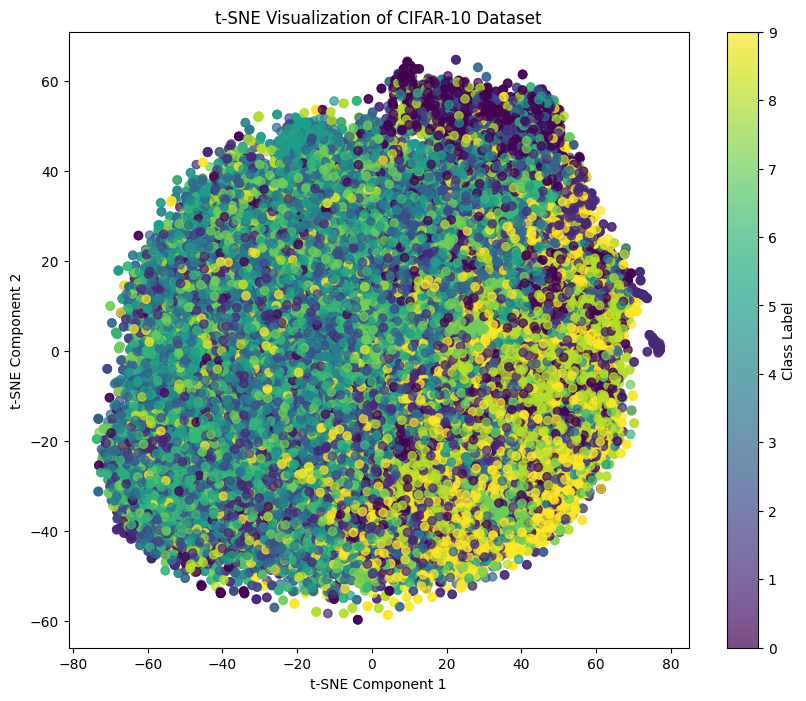

In [ ]:
flat_images = train_images.reshape(train_images.shape[0], -1)

tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(flat_images)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=train_labels.flatten(), cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of CIFAR-10 Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Class Label')
plt.show()

**t-SNE dimensionality reduction on the CIFAR-10 training pictures that have been flattened, and a 2D scatter plot is used to display the reduced data. An picture is represented by each point in the plot, with different colors denoting distinct class labels. Understanding the distribution and connections between classes in a lower-dimensional space is made easier by the ensuing depiction.**

**The blue and purple spots, which might stand for classes like "bird" and "airplane," appear to form a very prominent cluster in the upper-right corner of the plot, indicating that these classes are possibly more unique from the rest.**
**The green, yellow, and orange dots (perhaps belonging to the "frog," "deer," and "cat" classes) seem to be more jumbled, suggesting that these classes may have more characteristics in common, making them more difficult to identify.**


**Points of different colors are widely intermingled in a dense core region, indicating that numerous photos from different classes have common properties in this high-dimensional space.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from matplotlib.colors import ListedColormap
from tensorflow.keras.datasets import cifar10

In [ ]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
from skimage.color import rgb2gray
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version=

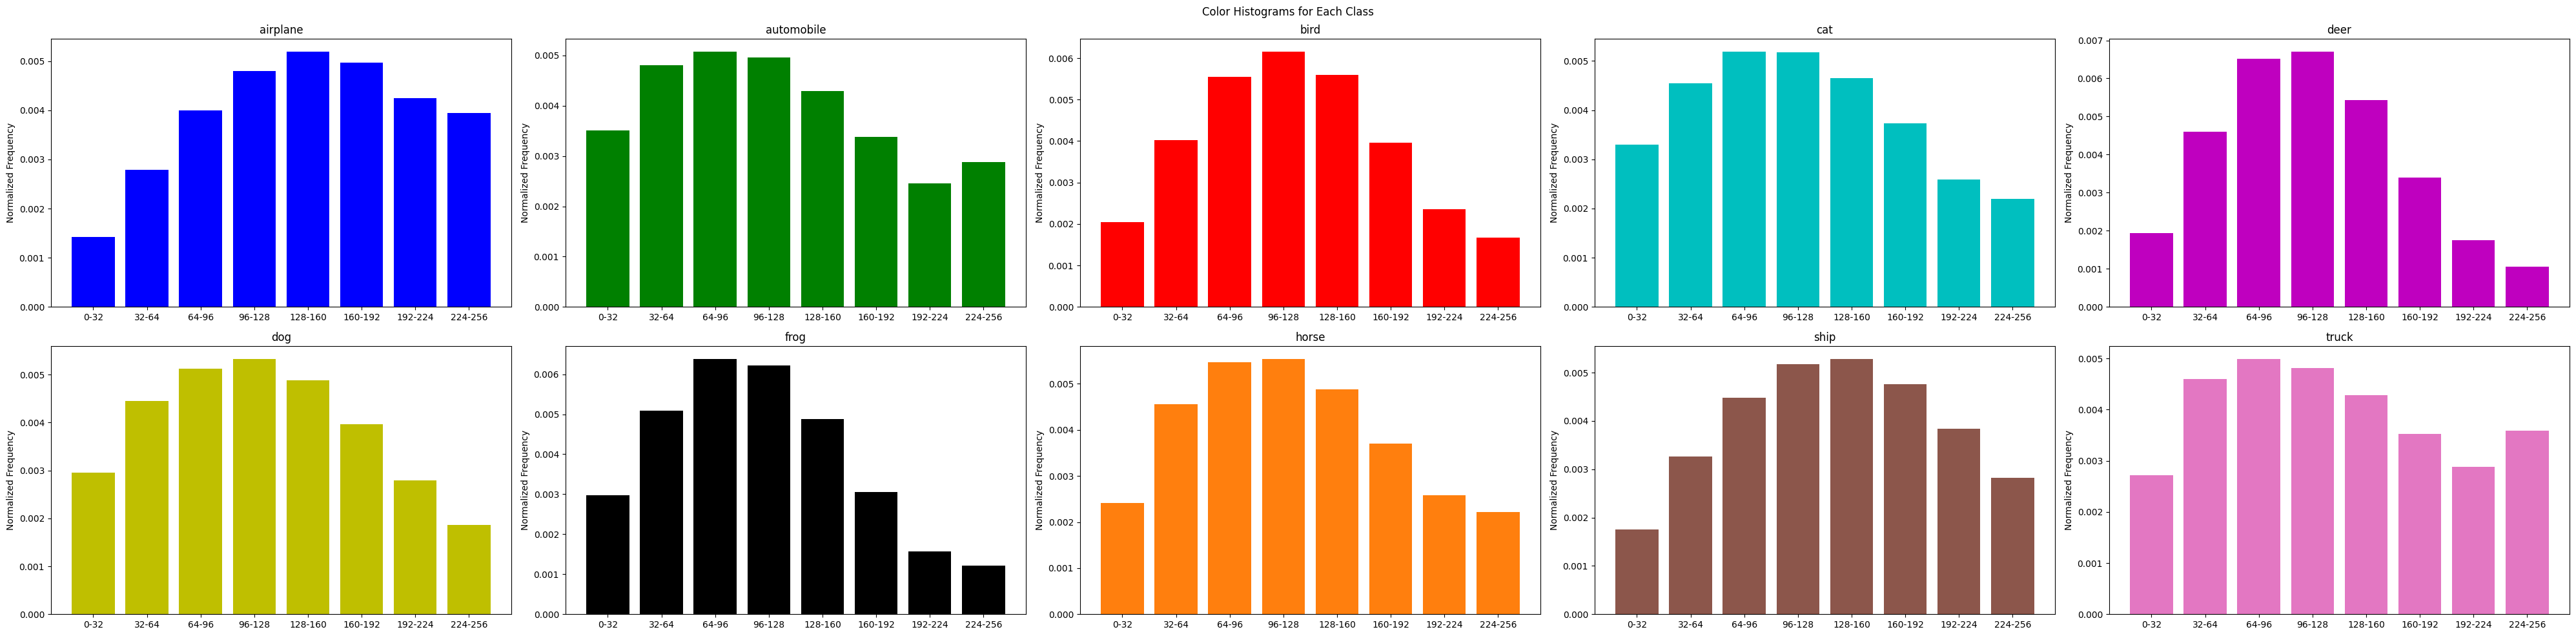

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:brown', 'tab:pink']

def compute_features(images, labels):
    labels_flat = labels.flatten()
    color_histograms = [np.histogram(images[labels_flat == i].reshape(-1, 3), bins=8, density=True)[0] for i in range(10)]
    gray_images = rgb2gray(images)
    gray_images = img_as_ubyte(gray_images)
    gray_images_reshaped = gray_images.reshape(images.shape[0], 32, 32)
    textures = [
        [
            greycoprops(greycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), prop=prop)
            for image in gray_images_reshaped[labels_flat == i]
        ]
        for i in range(10)
        for prop in ['contrast', 'dissimilarity', 'homogeneity']
    ]

    return color_histograms, textures

color_histograms, textures = compute_features(X_train, y_train)

fig, axs = plt.subplots(2, 5, figsize=(40, 10))
bin_edges = np.linspace(0, 256, 9)
bin_labels = [f"{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}" for i in range(len(bin_edges)-1)]

for i in range(10):
    axs[i // 5, i % 5].bar(np.arange(8), color_histograms[i], color=colors[i])
    axs[i // 5, i % 5].set_title(class_names[i])
    axs[i // 5, i % 5].set_xticks(np.arange(8))
    axs[i // 5, i % 5].set_xticklabels(bin_labels)
    axs[i // 5, i % 5].set_ylabel('Normalized Frequency')
plt.suptitle('Color Histograms for Each Class')
plt.tight_layout()
plt.show()

**The color bin or range of color values is represented by the x-axis, and the frequency or probability density of those color values is displayed on the y-axis.**


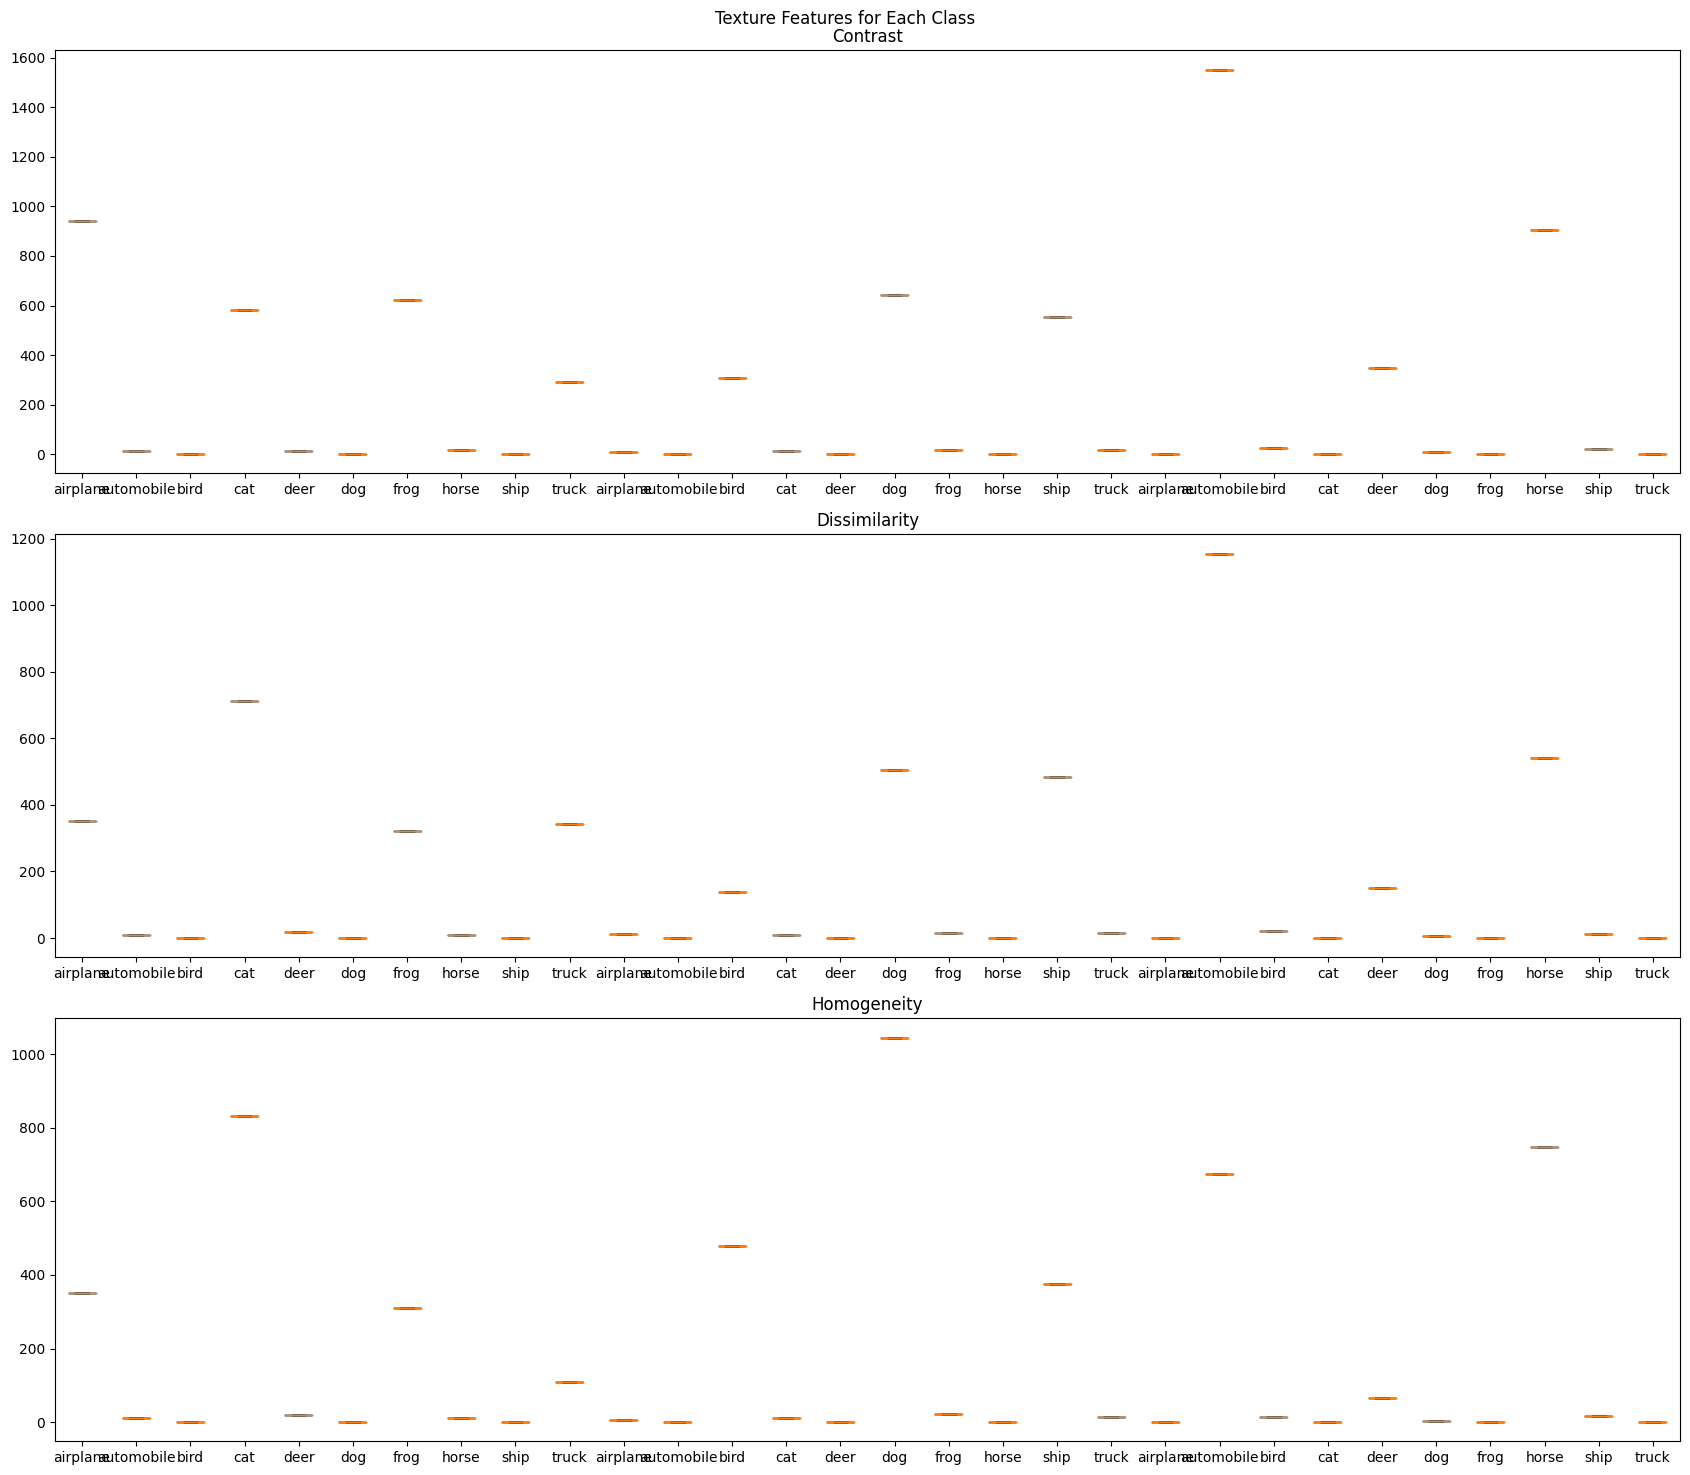

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(17, 15))
for i, prop in enumerate(['contrast', 'dissimilarity', 'homogeneity']):
    prop_values = [texture[i].ravel() for texture in textures]
    axs[i].boxplot(prop_values, labels=class_names * len(['contrast', 'dissimilarity', 'homogeneity']))
    axs[i].set_title(prop.capitalize())
plt.suptitle('Texture Features for Each Class')
plt.tight_layout()
plt.show()


**For every class in a dataset, the algorithm computes texture characteristics and color histograms. It computes normalized histograms (8 bins each) for the Red, Green, and Blue channels using NumPy. It uses grayscale photographs and the Gray-Level Co-occurrence Matrix (GLCM) to extract texture attributes, such as homogeneity, contrast, and dissimilarity. Two lists are returned by the function: textures and color histograms. When the code is applied to the training data, it displays the class-wise color distribution across 8 bins as color histograms in a 2x5 subplot grid.**











**Each texture feature subplot's class names are repeated three times along the x-axis. With the help of this condensed visualization technique, all three texture feature distributions within each class may be simultaneously shown, producing a succinct figure with 30 labels on the x-axis (10 classes x 3 texture features).**